In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cufflinks as cf
%reload_ext autoreload
%autoreload 2
cf.set_config_file(world_readable=True,theme='pearl')
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [80]:
df = pd.read_csv('../data/ceping.csv',encoding='gb18030')
df_z = df[['Z学习动力','Z学习能力','Z学习毅力']]
df_t = df[['T学习动力','T学习能力','T学习毅力']]

In [81]:
df_z.sample(10)
df_t.sample(10)

,Z学习动力,Z学习能力,Z学习毅力
1184,0.273226,0.132441,0.639161
910,0.339760,-0.163210,-0.264974
119,-0.601277,-0.098896,-0.256194
166,1.031855,-0.031123,0.666243
304,-1.277613,-1.014759,-0.562902
727,-1.037896,-1.359298,-0.753395
830,0.686322,0.037422,1.040729
325,-0.389385,-0.656045,-0.071800
342,0.076140,0.091652,-0.088121
965,1.269414,0.485904,1.147483


,T学习动力,T学习能力,T学习毅力
1169,43.065263,48.002829,48.330559
164,32.919438,39.020941,21.376801
253,48.484171,58.544717,49.637260
1034,49.549244,51.453957,56.623644
1159,41.929508,51.182008,58.671486
1058,53.768922,50.458206,55.236822
43,63.219840,57.101280,61.901469
471,52.135085,56.552918,47.525174
537,51.138181,46.882526,46.239175
523,58.599847,51.796832,50.208543


Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

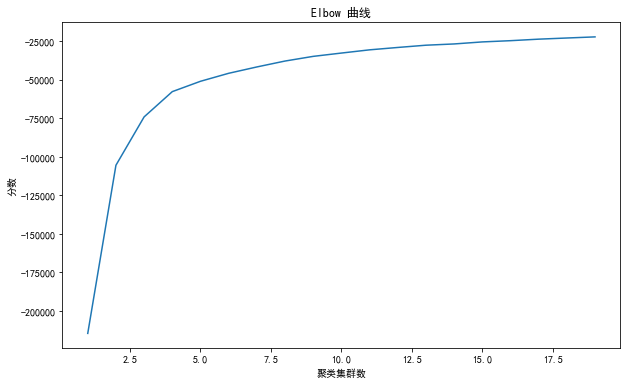

In [82]:
data = df_t
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

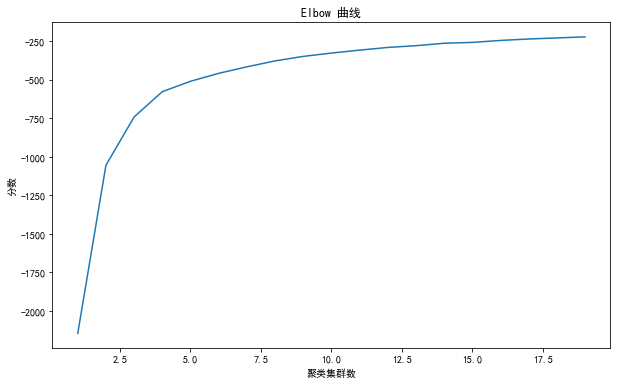

In [83]:
data = df_z
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

In [84]:
X = df_z
X = X.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

df_z['categories']=labels
df_z['categories']=df_z.categories.apply(lambda x: 'category'+str(x+1))

df_z.iplot(kind='scatter3d',
           x='Z学习动力',y='Z学习能力',z='Z学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='Z分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([1, 0, 1, ..., 3, 2, 2])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [85]:
X = df_t
X = X.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_
df_t['categories']=labels
df_t['categories']=df_t.categories.apply(lambda x: 'category'+str(x+1))

df_t.iplot(kind='scatter3d',
           x='T学习动力',y='T学习能力',z='T学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='T分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 3, 2, ..., 4, 0, 0])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

